In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get Datasets

In [2]:
df_train = pd.read_csv('../datasets/kitti_train_2.csv')
df_valid = pd.read_csv('../datasets/kitti_valid_2.csv')
df_test = pd.read_csv('../datasets/kitti_test_2.csv')

In [3]:
#df_train = pd.concat([df_train, df_valid], axis=0)
#df_train = pd.concat([df_train, df_test],  axis=0)

In [4]:
df_train

filename class        xmin       ymin       xmax       ymax  angle  \
0     006733.png   car  652.365360  178.79033  706.14460  222.54279  -1.67   
1     003179.png   car  468.749050  179.93590  497.07160  202.78680   1.71   
2     003080.png   car  326.937930  172.32402  401.73962  208.19362   2.05   
3     001156.png   car    0.666390  273.63025  279.55368  372.15042   2.68   
4     004767.png   car  359.059780  178.87877  395.27298  196.38824   1.98   
...          ...   ...         ...        ...        ...        ...    ...   
4504  007414.png   car  328.622740  191.20251  362.48062  244.27919   1.73   
4505  001370.png   car  461.222170  175.66153  516.60425  222.58430  -2.30   
4506  000230.png   car  395.971000  182.41078  437.31522  203.40242   1.82   
4507  003948.png   car    0.440861  184.29555  186.80028  261.62420   2.15   
4508  005868.png   car  459.396120  177.38786  558.21700  213.62946  -2.92   

       zloc weather  depth_y  depth_x  depth_mean  depth_min  depth_median  \
0     27.41   clone      212      700    3.527459   2.792553      3.168863   
1     57.86   clone      201      496    7.497460   6.612220      7.516082   
2     38.43   clone      187      394    5.082507   3.518659      4.976468   
3      1.45   clone      371      128    0.537810   0.402693      0.499386   
4     56.09   clone      193      359    7.634956   7.002961      7.594586   
...     ...     ...      ...      ...         ...        ...           ...   
4504  20.50   clone      222      328    2.796164   2.544956      2.668862   
4505  22.01   clone       11     1085    2.885096   2.349243      2.714203   
4506  52.75   clone      202      432    6.412589   5.178451      6.040556   
4507  15.76   clone      249       31    2.524640   1.726147      1.991942   
4508  32.99   clone      212      547    4.920863   4.226955      4.552606   

      depth_max  depth_mean_trim       width    height  
0      8.368694         3.197263   53.779240  43.75246  
1      8.086261         7.518451   28.322550  22.85090  
2      7.464012         5.063543   74.801690  35.86960  
3      1.022602         0.504887  278.887290  98.52017  
4      8.355259         7.613065   36.213200  17.50947  
...         ...              ...         ...       ...  
4504   3.502961         2.652657   33.857880  53.07668  
4505   5.121170         2.722741   55.382080  46.92277  
4506   9.127069         6.130626   41.344220  20.99164  
4507   8.189312         2.023925  186.359419  77.32865  
4508   7.616656         4.564187   98.820880  36.24160  

[30053 rows x 18 columns]

In [5]:
df_train['filename'].unique()

array(['006733.png', '003179.png', '003080.png', ..., '006010.png',
       '007441.png', '000230.png'], dtype=object)

In [6]:
df_train[df_train['filename']=='000032.png']['filename'].index

Int64Index([4667, 16359, 17822, 20894, 3161], dtype='int64')

In [7]:
df_train['class'].value_counts()

car        25099
person      3749
truck        662
train        199
Misc         192
bicycle      152
Name: class, dtype: int64

In [8]:
df_train[['depth_mean']].sort_values(by='depth_mean')

depth_mean
1120     0.440354
1765     0.491386
17079    0.495047
9042     0.501174
557      0.503512
...           ...
11715    9.846435
3854     9.850986
5814     9.855421
483      9.865881
6590     9.918483

[30053 rows x 1 columns]

In [9]:
df_train.describe()

xmin          ymin          xmax          ymax         angle  \
count  30053.000000  30053.000000  30053.000000  30053.000000  30053.000000   
mean     508.049651    177.947929    603.302915    245.452279     -0.055805   
std      270.117747     20.776393    268.921064     52.948142      1.790940   
min       -2.276925     -0.301849     11.237398    133.432740     -3.140000   
25%      338.777440    171.045990    433.325530    206.813430     -1.640000   
50%      531.764300    178.063340    571.214700    225.902770     -0.740000   
75%      680.452300    185.099910    739.685000    269.077820      1.790000   
max     1228.319700    333.327300   1242.628900    375.713170      3.140000   

               zloc       depth_y       depth_x    depth_mean     depth_min  \
count  30053.000000  30053.000000  30053.000000  30053.000000  30053.000000   
mean      27.090794    221.373706    553.102619      3.665013      2.909736   
std       17.006855     50.101268    298.093372      2.127862      1.917640   
min       -1.870000      0.000000      0.000000      0.440354      0.170277   
25%       13.390000    193.000000    363.000000      1.889741      1.369742   
50%       23.810000    208.000000    547.000000      3.322120      2.496624   
75%       37.770000    236.000000    726.000000      5.114421      4.068896   
max       86.240000    373.000000   1241.000000      9.918483      9.689011   

       depth_median     depth_max  depth_mean_trim         width        height  
count  30053.000000  30053.000000     30053.000000  30053.000000  30053.000000  
mean       3.400733      6.533021         3.418906     95.253264     67.504349  
std        2.134397      2.476323         2.134625     86.719087     50.453180  
min        0.367774      0.705047         0.375702      8.186540      8.194160  
25%        1.644444      4.506798         1.655512     37.270900     31.136880  
50%        2.977812      7.068535         2.989460     62.677670     48.481150  
75%        4.777384      8.770459         4.801059    118.525840     88.426040  
max        9.907341      9.982041         9.891214    721.560590    371.316579

In [10]:
df_train['class'].unique()

array(['car', 'person', 'truck', 'Misc', 'bicycle', 'train'], dtype=object)

In [11]:
# onehot encoding
class_dummy = pd.get_dummies(df_train['class'])
df_train = pd.concat([df_train, class_dummy], axis=1)

class_dummy = pd.get_dummies(df_valid['class'])
df_valid = pd.concat([df_valid, class_dummy], axis=1)

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30053 entries, 0 to 4508
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         30053 non-null  object 
 1   class            30053 non-null  object 
 2   xmin             30053 non-null  float64
 3   ymin             30053 non-null  float64
 4   xmax             30053 non-null  float64
 5   ymax             30053 non-null  float64
 6   angle            30053 non-null  float64
 7   zloc             30053 non-null  float64
 8   weather          30053 non-null  object 
 9   depth_y          30053 non-null  int64  
 10  depth_x          30053 non-null  int64  
 11  depth_mean       30053 non-null  float64
 12  depth_min        30053 non-null  float64
 13  depth_median     30053 non-null  float64
 14  depth_max        30053 non-null  float64
 15  depth_mean_trim  30053 non-null  float64
 16  width            30053 non-null  float64
 17  height       

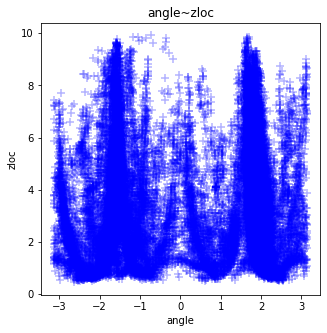

In [13]:
z_size = df_train.zloc

df_train.plot(kind='scatter', x='angle', y='depth_mean', marker='+', figsize=(5,5), cmap='viridis', c='blue', s=50, alpha=0.3)
plt.xlabel('angle')
plt.ylabel('zloc')
plt.title('angle~zloc')
plt.show()

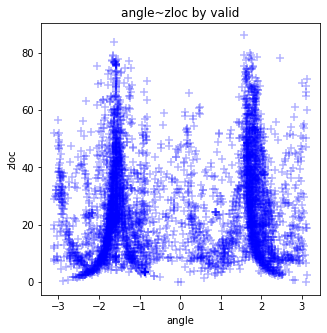

In [14]:
z_size = df_valid.zloc

df_valid.plot(kind='scatter', x='angle', y='zloc', marker='+', figsize=(5,5), cmap='viridis', c='blue', s=50, alpha=0.3)
plt.xlabel('angle')
plt.ylabel('zloc')
plt.title('angle~zloc by valid')
plt.show()

#### Visualization

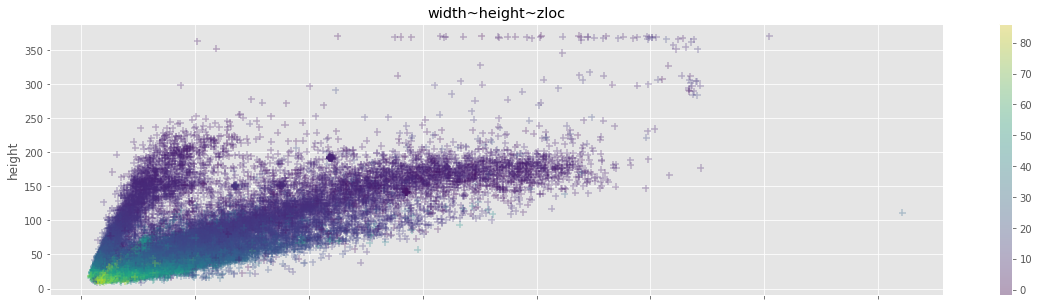

In [15]:
z_size = df_train.zloc
plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=50, alpha=0.3)
plt.xlabel('width')
plt.ylabel('height')
plt.title('width~height~zloc')
plt.show()

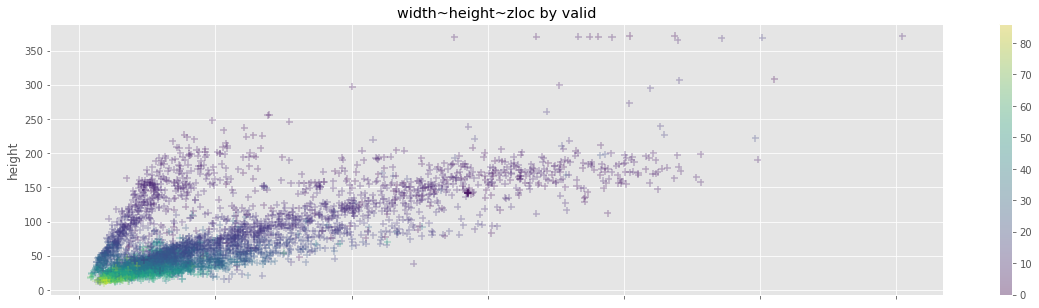

In [16]:
z_size = df_valid.zloc
plt.style.use('ggplot')

df_valid.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=50, alpha=0.3)
plt.xlabel('width')
plt.ylabel('height')
plt.title('width~height~zloc by valid')
plt.show()

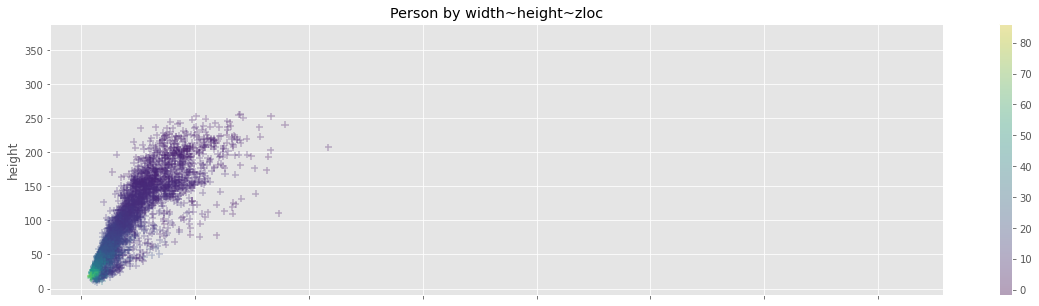

In [17]:
z_size = df_train.zloc
person = df_train['person'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=person, alpha=0.3)
plt.title('Person by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

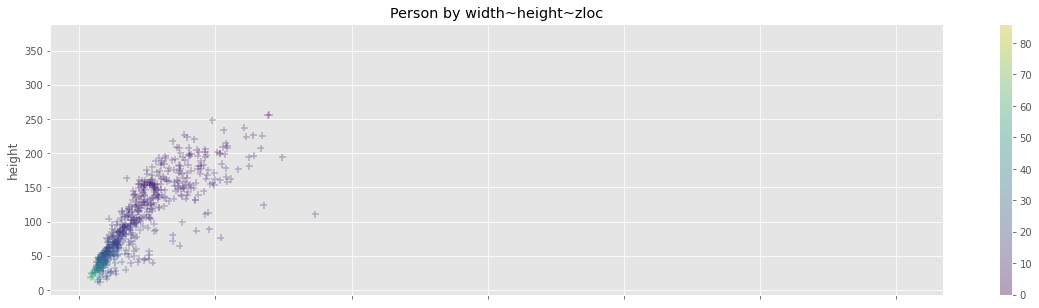

In [18]:
z_size = df_valid.zloc
person = df_valid['person'].values * 50

plt.style.use('ggplot')

df_valid.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=person, alpha=0.3)
plt.title('Person by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

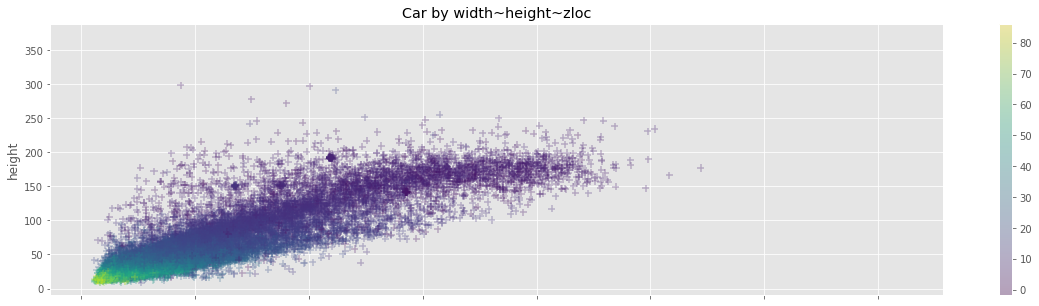

In [19]:
z_size = df_train.zloc
car = df_train['car'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=car, alpha=0.3)
plt.title('Car by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

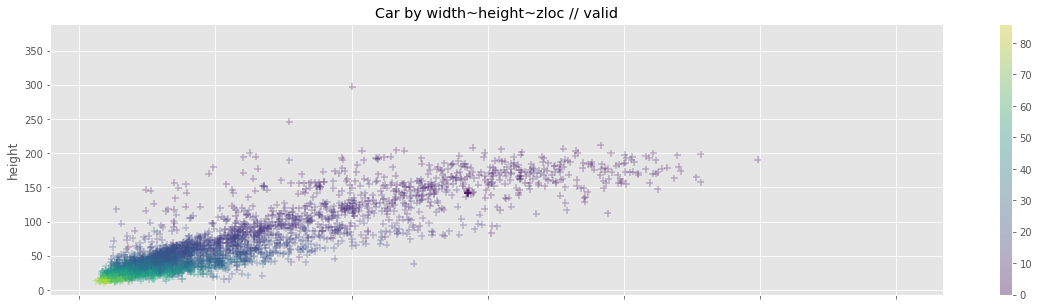

In [20]:
z_size = df_valid.zloc
car = df_valid['car'].values * 50

plt.style.use('ggplot')

df_valid.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=car, alpha=0.3)
plt.title('Car by width~height~zloc // valid')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

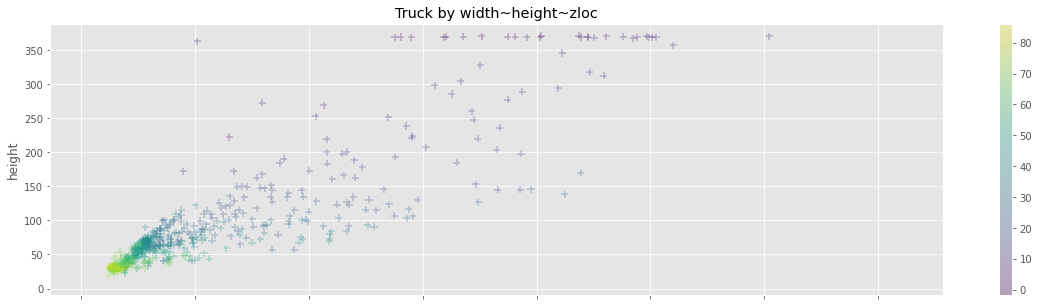

In [21]:
z_size = df_train.zloc
truck = df_train['truck'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=truck, alpha=0.3)
plt.title('Truck by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

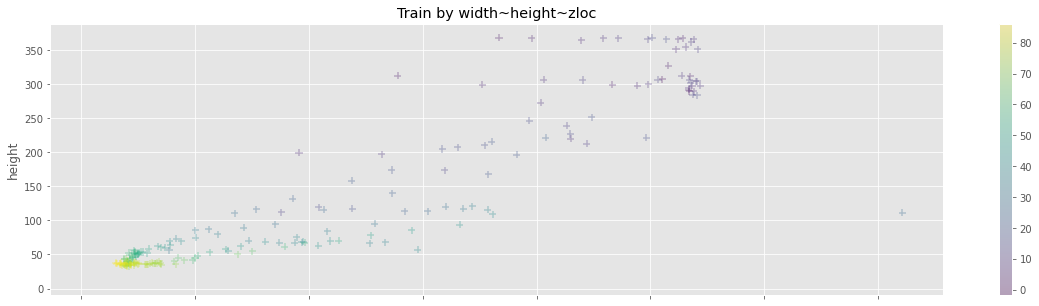

In [22]:
z_size = df_train.zloc
train = df_train['train'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=train, alpha=0.3)
plt.title('Train by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

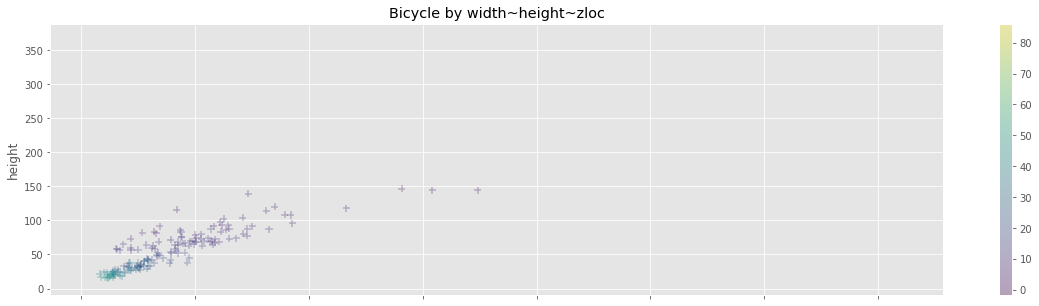

In [23]:
z_size = df_train.zloc
bicycle = df_train['bicycle'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=bicycle, alpha=0.3)
plt.title('Bicycle by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

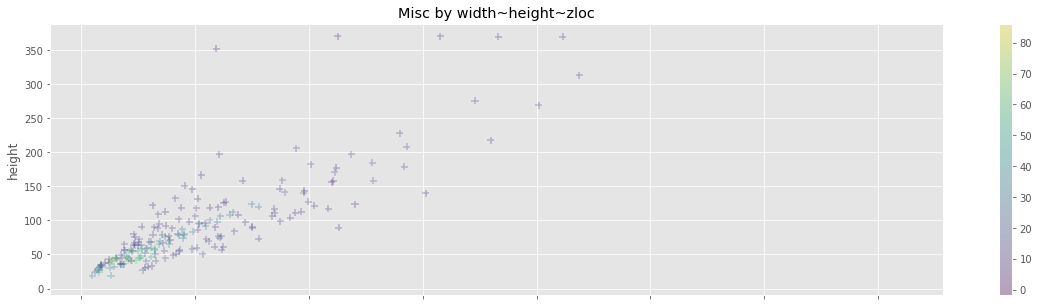

In [24]:
z_size = df_train.zloc
Misc = df_train['Misc'].values * 50

plt.style.use('ggplot')

df_train.plot(kind='scatter', x='width', y='height', marker='+', figsize=(20,5), cmap='viridis', c=z_size, s=Misc, alpha=0.3)
plt.title('Misc by width~height~zloc')
plt.xlabel('width')
plt.ylabel('height')
plt.show()

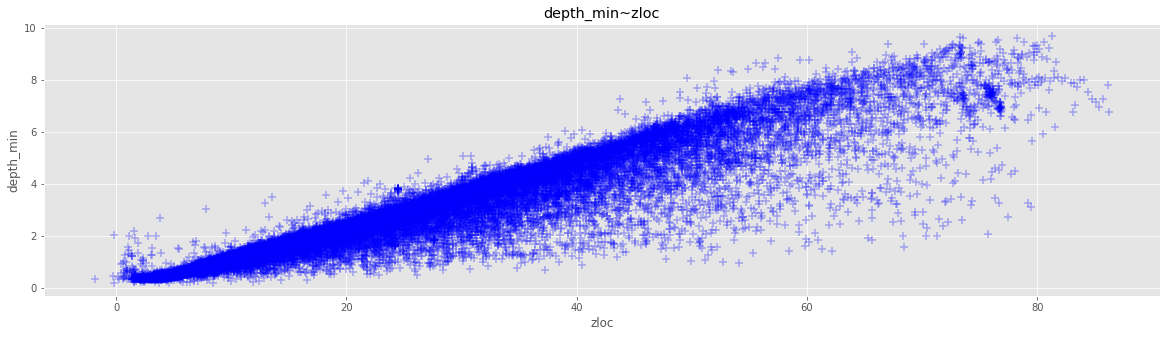

In [25]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_min', marker='+', figsize=(20,5), c='blue', s=50, alpha=0.3)
plt.title('depth_min~zloc')
plt.show()

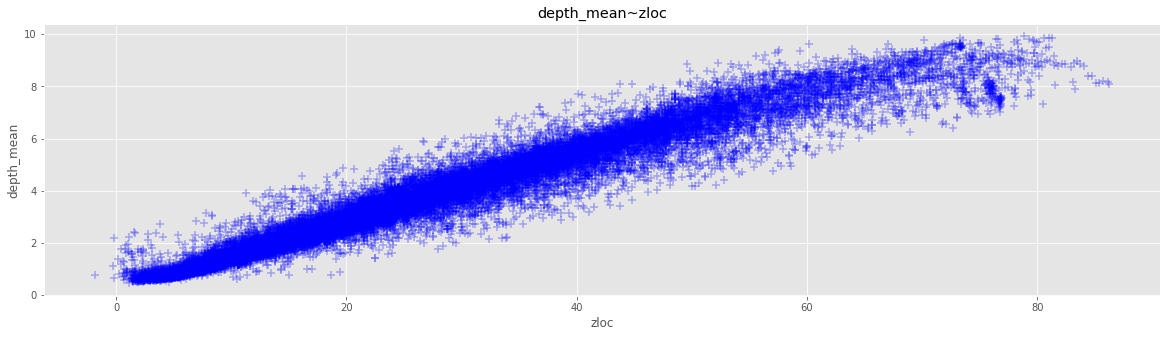

In [26]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='blue', s=50, alpha=0.3)
plt.title('depth_mean~zloc')
plt.show()

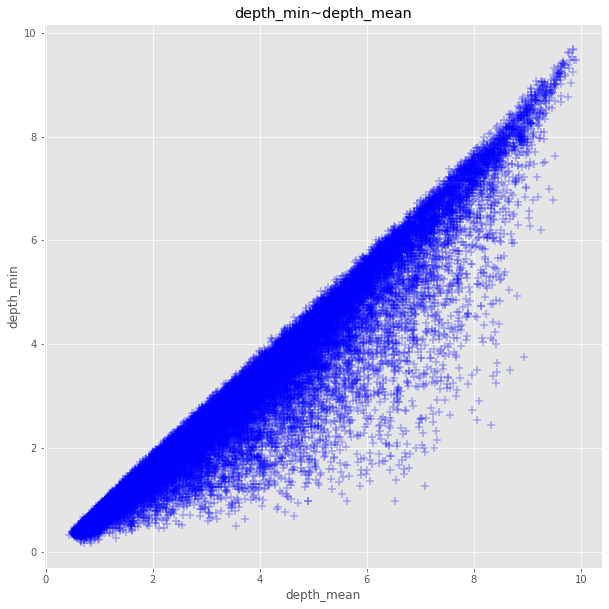

In [27]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_mean', y='depth_min', marker='+', figsize=(10,10), c='blue', s=50, alpha=0.3)
plt.title('depth_min~depth_mean')
plt.show()

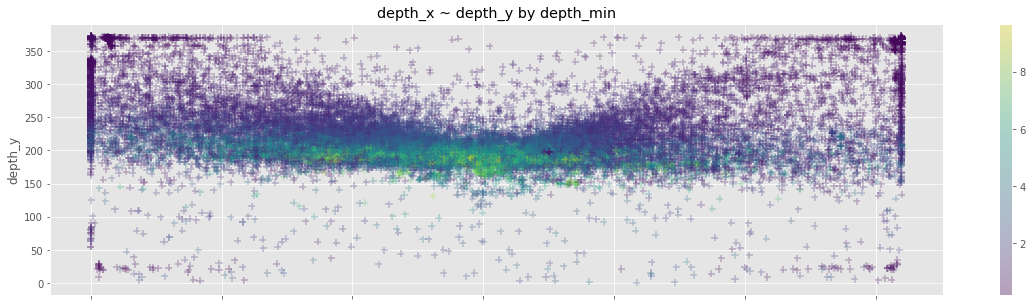

In [28]:
min_c = df_train.depth_min

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_x', y='depth_y', marker='+', figsize=(20,5), cmap='viridis', c=min_c, s=50, alpha=0.3)
plt.title('depth_x ~ depth_y by depth_min')
plt.show()

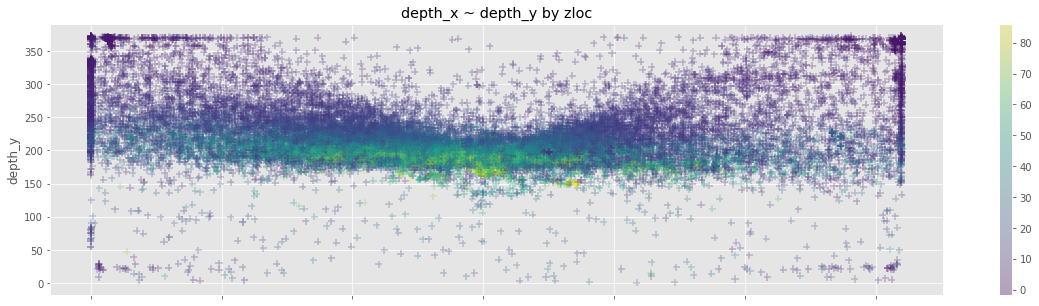

In [29]:
zloc_c = df_train.zloc

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_x', y='depth_y', marker='+', figsize=(20,5), cmap='viridis', c=zloc_c, s=50, alpha=0.3)
plt.title('depth_x ~ depth_y by zloc')
plt.show()

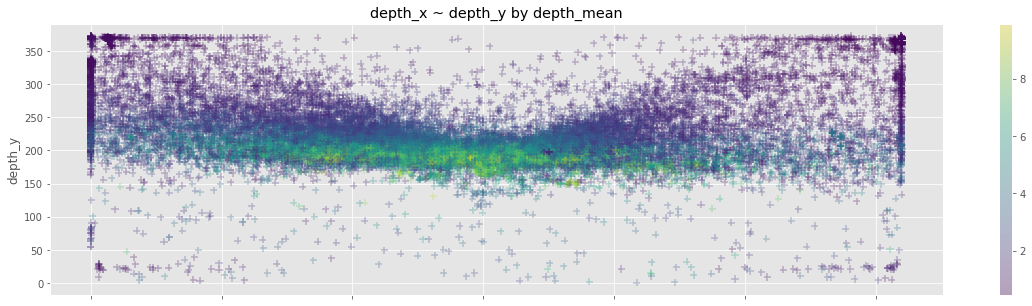

In [30]:
mean_c = df_train.depth_mean

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='depth_x', y='depth_y', marker='+', figsize=(20,5), cmap='viridis', c=mean_c, s=50, alpha=0.3)
plt.title('depth_x ~ depth_y by depth_mean')
plt.show()

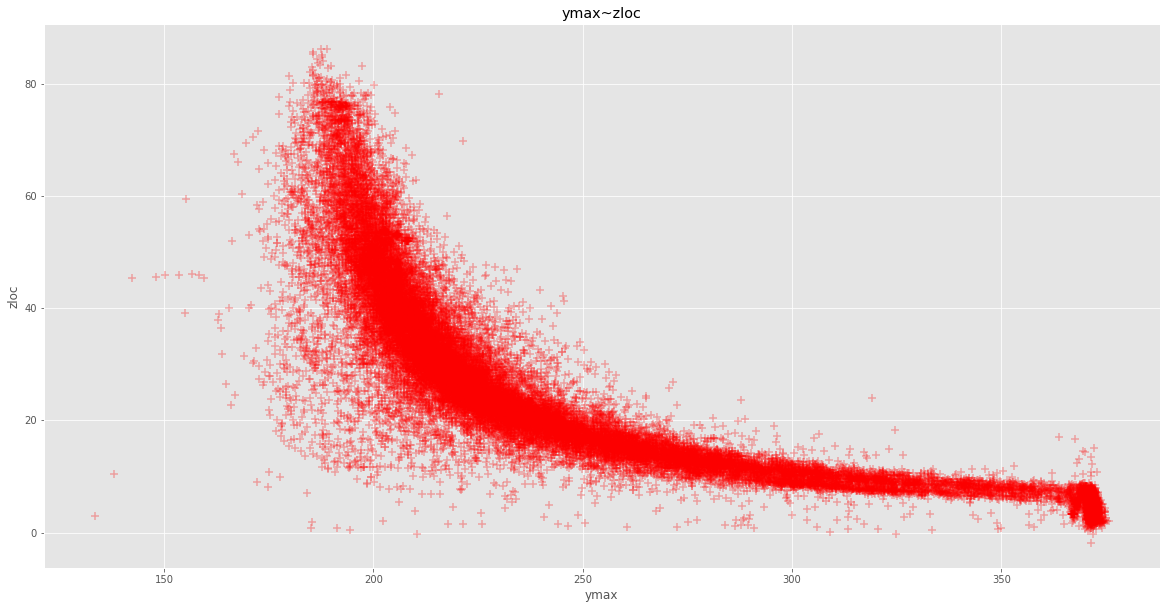

In [31]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='ymax', y='zloc', marker='+', figsize=(20,10), c='red', s=50, alpha=0.3)
plt.title('ymax~zloc')
plt.show()

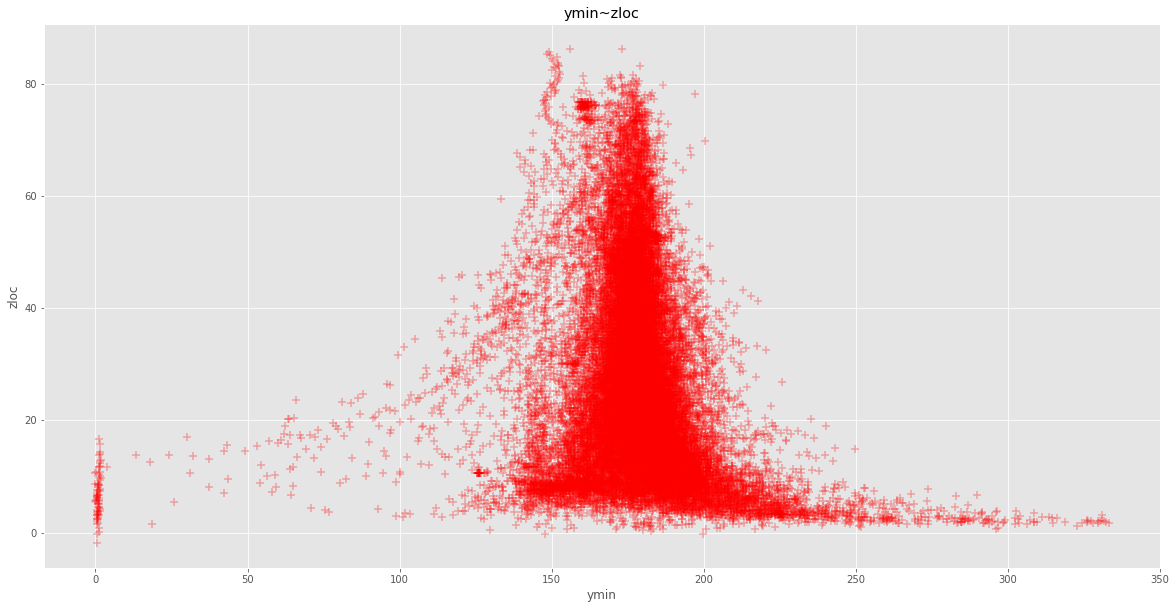

In [32]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='ymin', y='zloc', marker='+', figsize=(20,10), c='red', s=50, alpha=0.3)
plt.title('ymin~zloc')
plt.show()

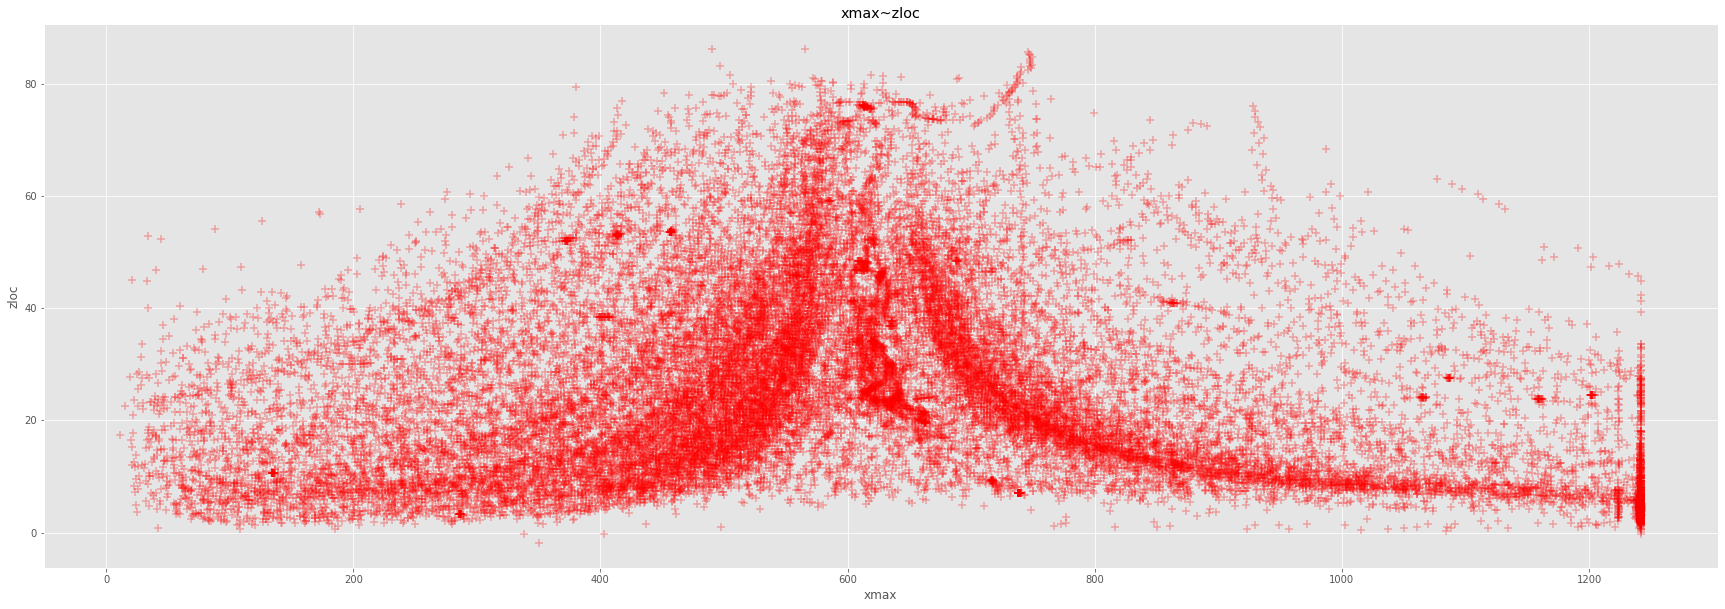

In [33]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='xmax', y='zloc', marker='+', figsize=(30,10), c='red', s=50, alpha=0.3)
plt.title('xmax~zloc')
plt.show()

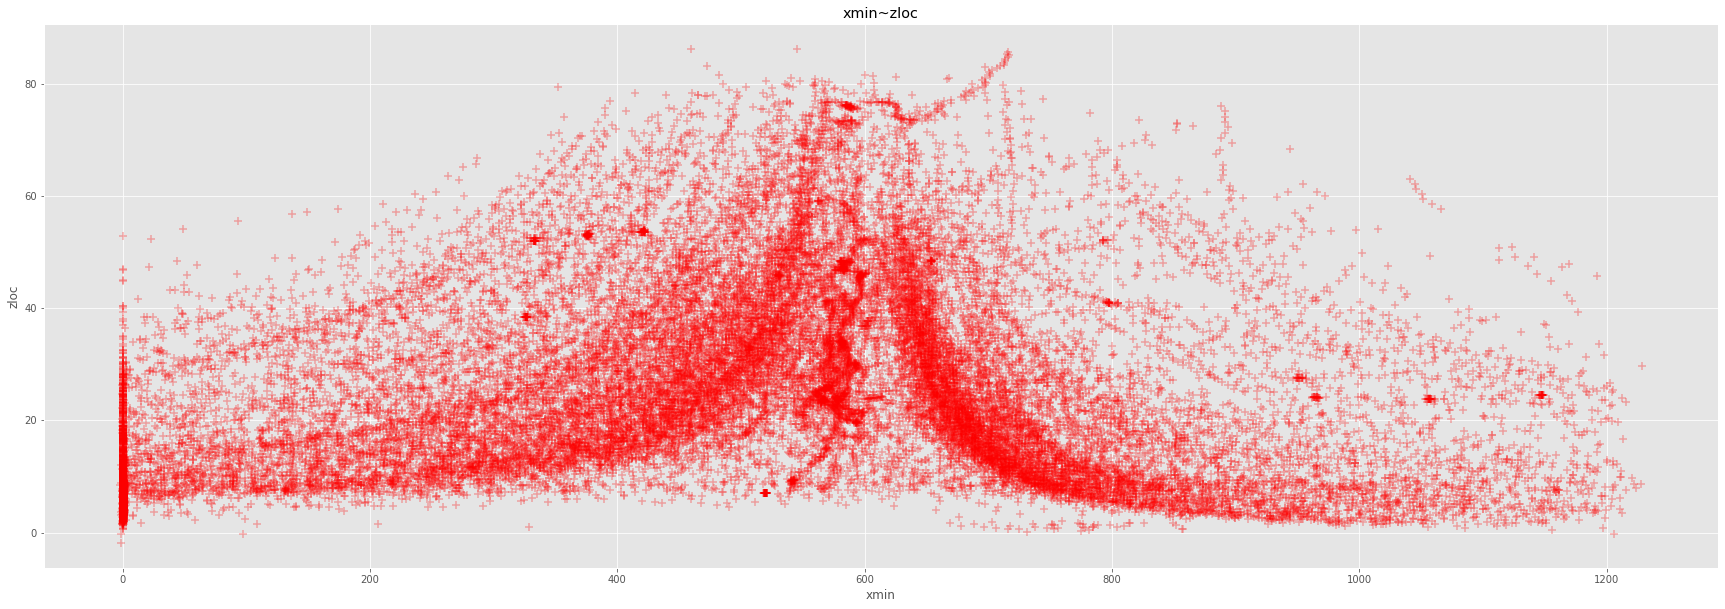

In [34]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='xmin', y='zloc', marker='+', figsize=(30,10), c='red', s=50, alpha=0.3)
plt.title('xmin~zloc')
plt.show()

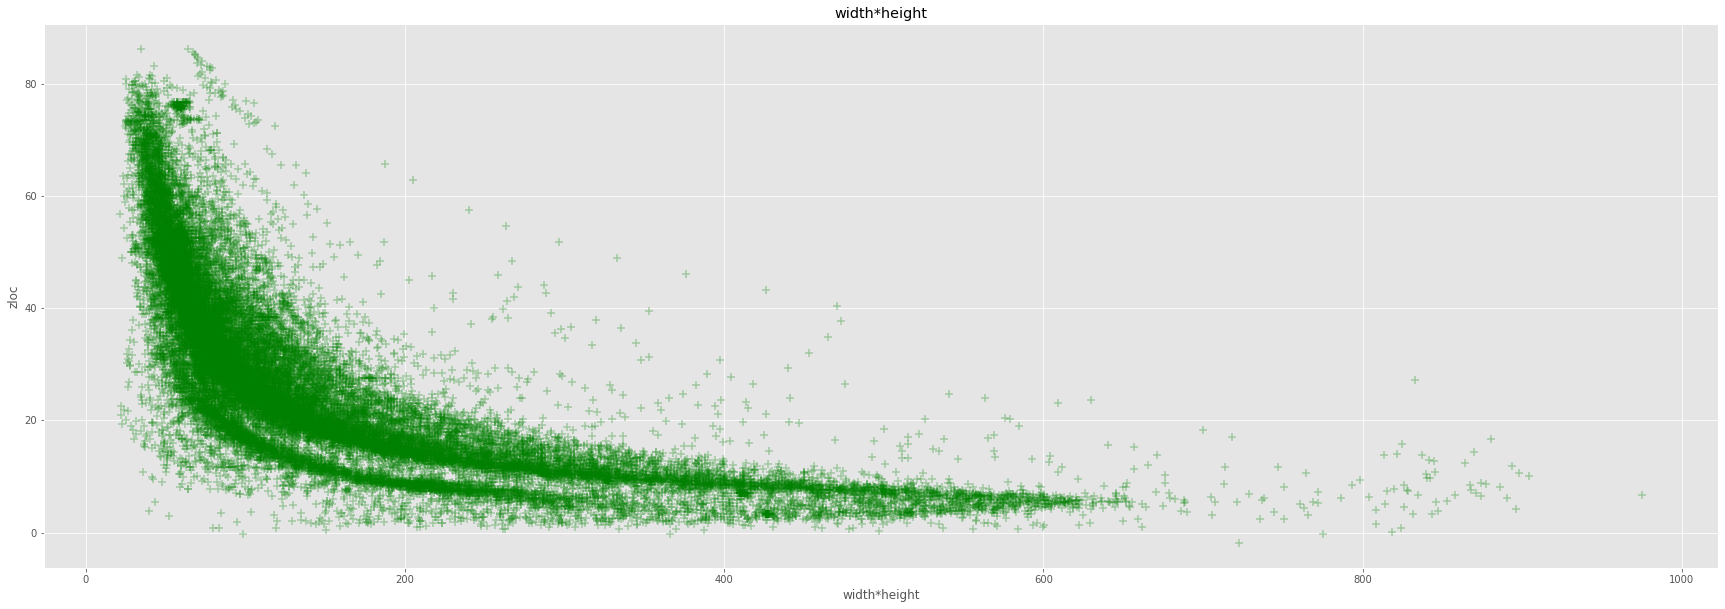

In [35]:
df_train['width*height'] = df_train['width']+df_train['height']

df_train.plot(kind='scatter', x='width*height', y='zloc', marker='+', figsize=(30,10), c='green', s=50, alpha=0.3)
plt.title('width*height')
plt.show()

# Filename 으로 구분해서 한번 살펴보기

In [36]:
df_train[['filename']].value_counts()

filename  
004139.png    17
005027.png    15
005226.png    14
006139.png    14
003120.png    14
              ..
002906.png     1
002908.png     1
002909.png     1
006158.png     1
000000.png     1
Length: 7389, dtype: int64

In [37]:
import numpy as np
mask = (df_train['zloc']<50) & (df_train['depth_mean']>8) & (df_train['class']=='Misc') # 너무 이상한 값 # ex1) 80, 2

#mask = df_train['depth_mean'] == np.inf
df_mask = df_train[mask]
df_mask

Empty DataFrame
Columns: [filename, class, xmin, ymin, xmax, ymax, angle, zloc, weather, depth_y, depth_x, depth_mean, depth_min, depth_median, depth_max, depth_mean_trim, width, height, Misc, bicycle, car, person, train, truck, width*height]
Index: []

[0 rows x 25 columns]

In [38]:
#mask0 = df_train['zloc']/df_train['depth_mean'] < 15
#df_train = df_train[mask0]

In [39]:
df_filename = df_train[df_train['filename']=='003623.png']
df_filename

filename class      xmin       ymin      xmax       ymax  angle  \
1637  003623.png   car  514.7844  201.24007  565.8306  242.52025   1.64   

       zloc weather  depth_y  ...  depth_mean_trim    width    height  Misc  \
1637  30.86   clone      224  ...         4.039669  51.0462  41.28018     0   

      bicycle  car  person  train  truck  width*height  
1637        0    1       0      0      0      92.32638  

[1 rows x 25 columns]

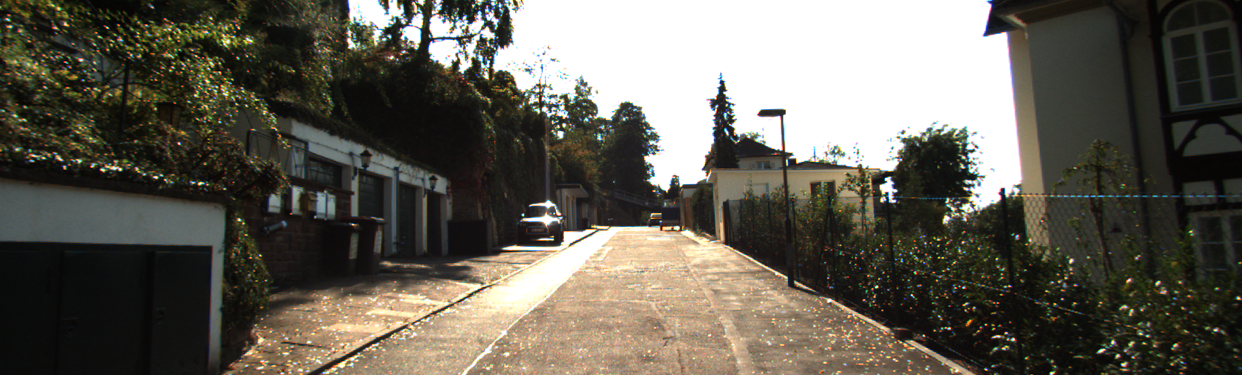

In [40]:
from PIL import Image
#img = Image.open("../datasets/data/image/train/002527.png") # 3695랑 거의 same...
img = Image.open("../datasets/data/image/train/003623.png")
img

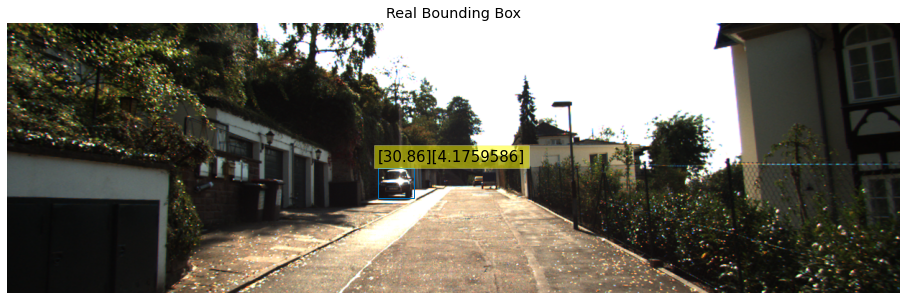

In [41]:
class_list = df_filename[['class']].values
coordinates = df_filename[['xmin','ymin','xmax','ymax']].values
z_loc = df_filename[['zloc']].values
depth_min = df_filename[['depth_mean']].values

# colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# 시각화 (특정 부분만)
def plot_results0(pil_img, class_name, boxes, zloc, depth_min):
    plt.figure(figsize=(16,10))
    plt.imshow(pil_img)
    ax = plt.gca()

    for p, z, depth, (xmin, ymin, xmax, ymax), c in zip(class_name, zloc, depth_min, boxes.tolist(), COLORS * 100):
        #cl = p.argmax()
        text = p
        if z > 0 :
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin,
                                   fill=False, color=c, linewidth=1))
            
            ax.text(xmin, ymin-10, str(z)+str(depth), fontsize=15,
                    bbox=dict(facecolor='yellow', alpha=0.5))
    plt.axis('off')
    plt.title('Real Bounding Box')
    plt.show()

plot_results0(img, class_list, coordinates, z_loc, depth_min)

In [42]:
df_train['depth_min'].value_counts()

5.407954    2
4.356449    2
1.256036    2
0.406208    2
1.301767    2
           ..
2.200693    1
1.074461    1
3.637128    1
5.574713    1
4.226955    1
Name: depth_min, Length: 30036, dtype: int64

In [43]:
mask1 = (df_train['depth_mean']-0.1091*df_train['zloc'])+1.5365 > 0
#mask2 = (df_train['depth_mean']-0.13*df_train['zloc'])-2.5 < 0
#mask3 = (mask1 & mask2)
#ask3 = (df_valid['depth_mean']-0.0930*df_valid['zloc']+1.116) > 0
df_train = df_train[mask1]
#df_train = df_train[mask3]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30053 entries, 0 to 4508
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   filename         30053 non-null  object 
 1   class            30053 non-null  object 
 2   xmin             30053 non-null  float64
 3   ymin             30053 non-null  float64
 4   xmax             30053 non-null  float64
 5   ymax             30053 non-null  float64
 6   angle            30053 non-null  float64
 7   zloc             30053 non-null  float64
 8   weather          30053 non-null  object 
 9   depth_y          30053 non-null  int64  
 10  depth_x          30053 non-null  int64  
 11  depth_mean       30053 non-null  float64
 12  depth_min        30053 non-null  float64
 13  depth_median     30053 non-null  float64
 14  depth_max        30053 non-null  float64
 15  depth_mean_trim  30053 non-null  float64
 16  width            30053 non-null  float64
 17  height       

# 새롭게 추가된 변수 살펴보기

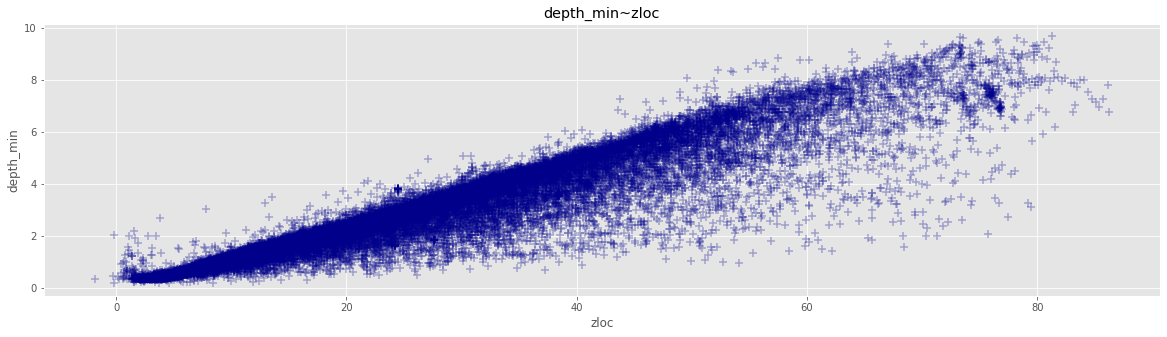

In [44]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_min', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_min~zloc')
plt.show()

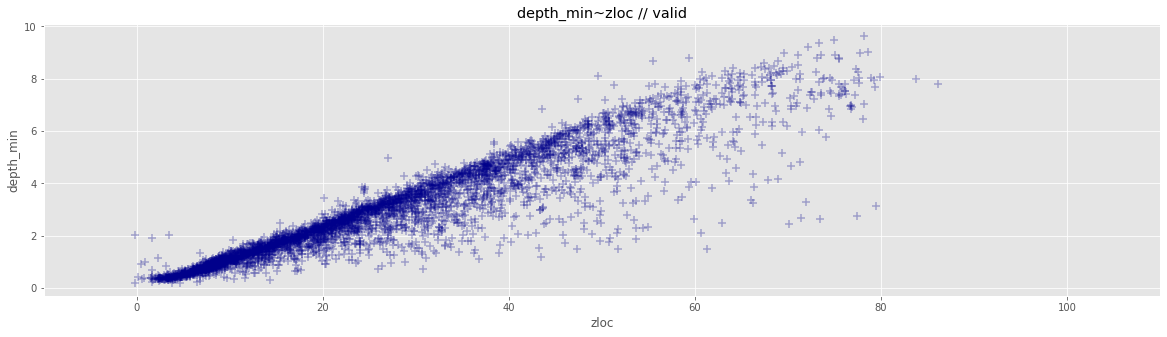

In [45]:
plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_min', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_min~zloc // valid')
plt.xlim(-10,110)
plt.show()

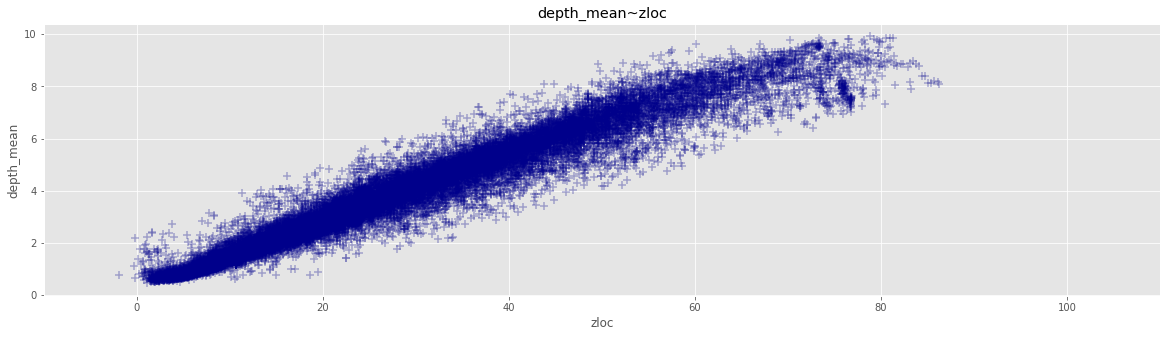

In [46]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_mean~zloc')
plt.xlim(-10,110)
plt.show()

In [47]:
len(df_valid)

4507

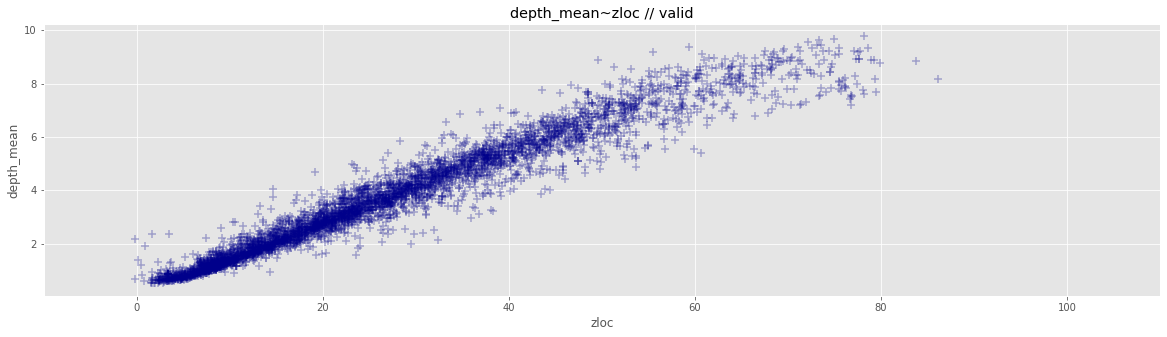

In [48]:
plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_mean~zloc // valid')
plt.xlim(-10,110)
plt.show()

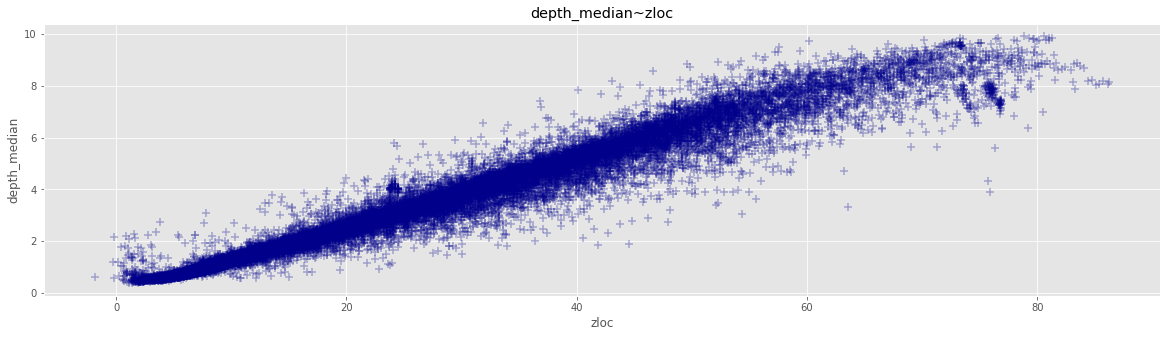

In [49]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_median', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_median~zloc')
plt.show()

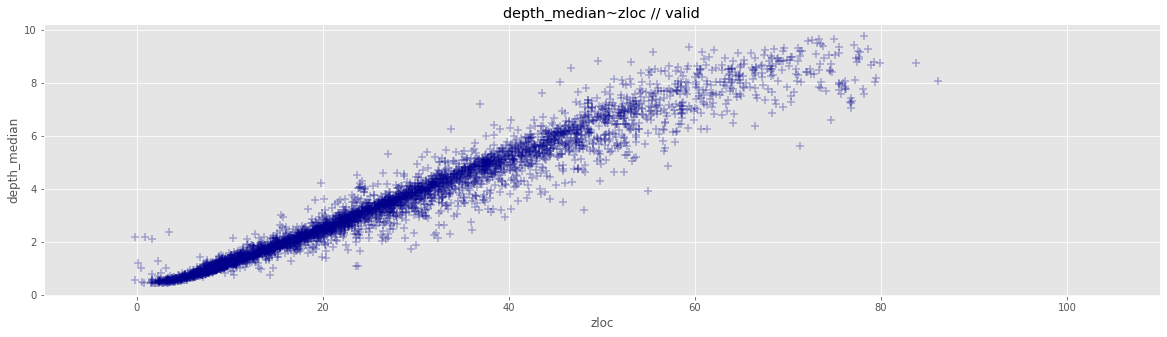

In [50]:
plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_median', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_median~zloc // valid')
plt.xlim(-10,110)
plt.show()

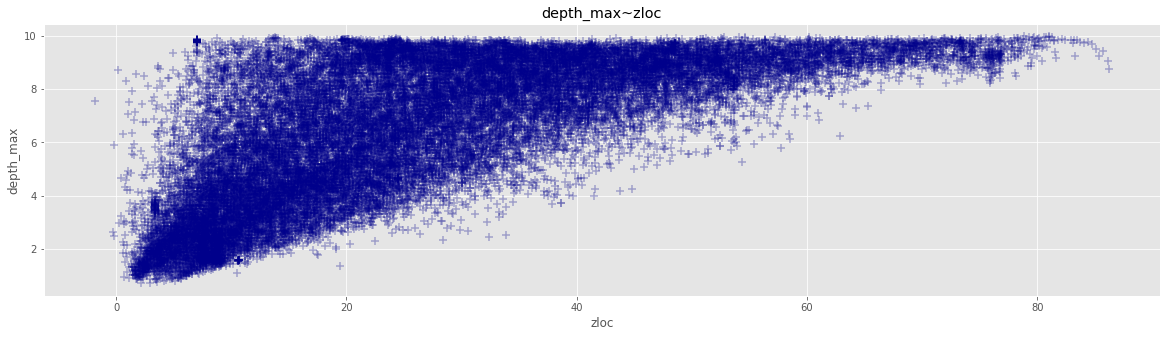

In [51]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_max', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_max~zloc')
plt.show()

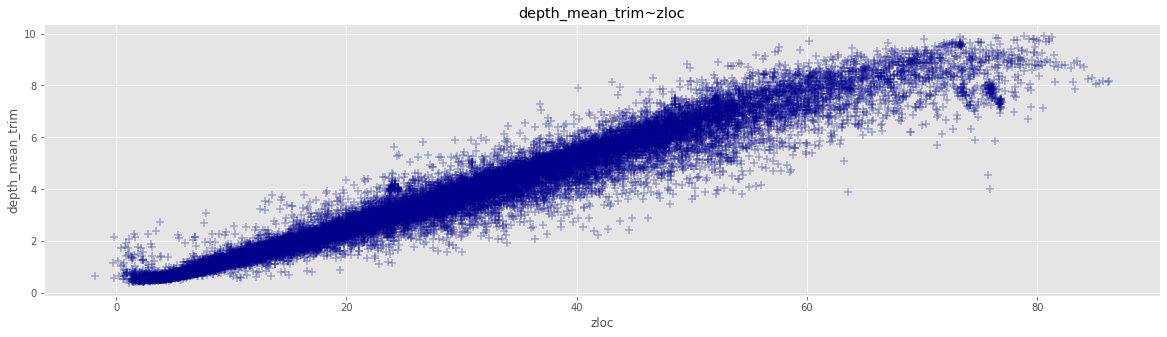

In [52]:
plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean_trim', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_mean_trim~zloc')
plt.show()

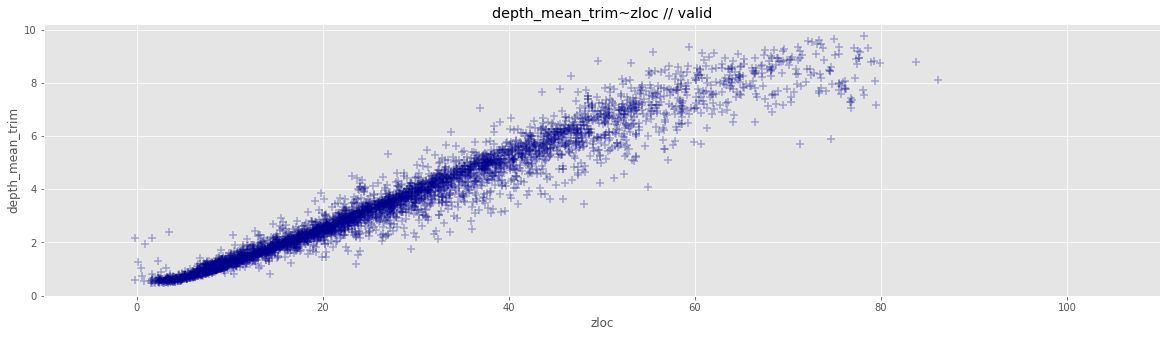

In [53]:
plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean_trim', marker='+', figsize=(20,5), c='darkblue', s=50, alpha=0.3)
plt.title('depth_mean_trim~zloc // valid')
plt.xlim(-10,110)
plt.show()

# 사람에 대한 분포

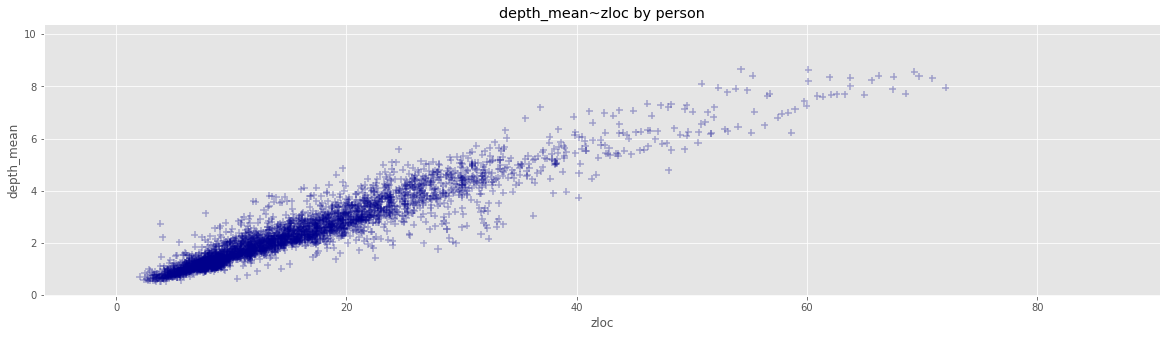

In [54]:
person = df_train['person'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=person, alpha=0.3)
plt.title('depth_mean~zloc by person')
plt.show()

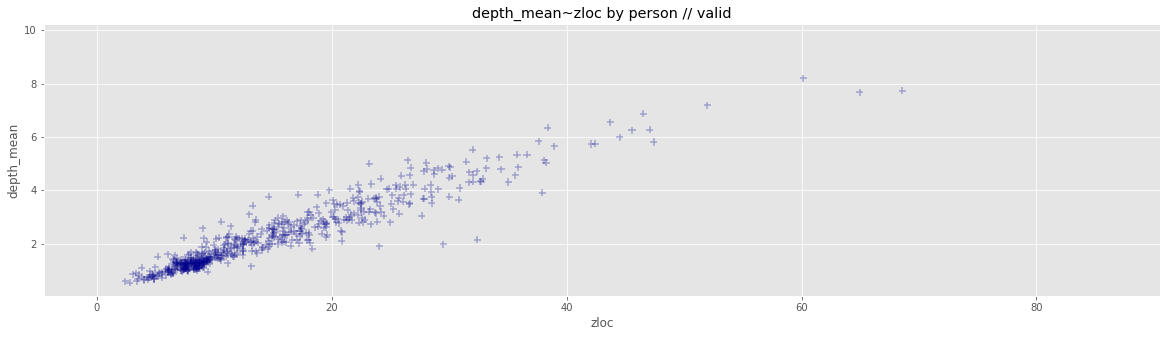

In [55]:
person = df_valid['person'].values * 50

plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=person, alpha=0.3)
plt.title('depth_mean~zloc by person // valid')
plt.show()

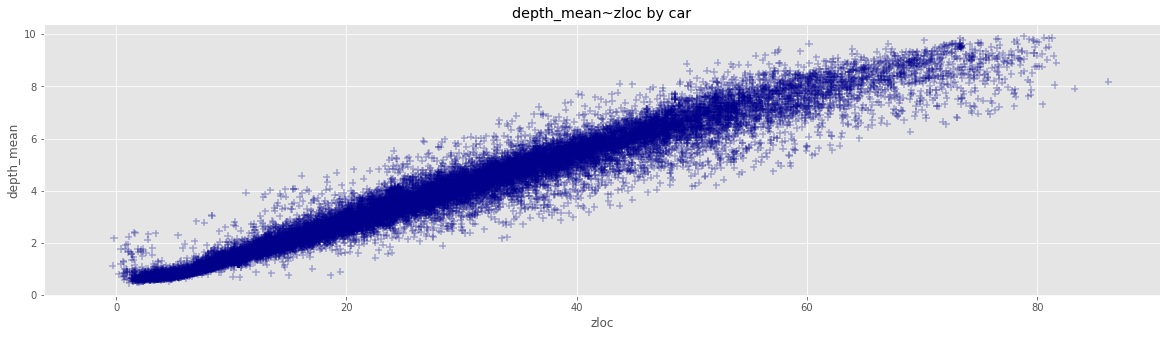

In [56]:
car = df_train['car'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=car, alpha=0.3)
plt.title('depth_mean~zloc by car')
plt.show()

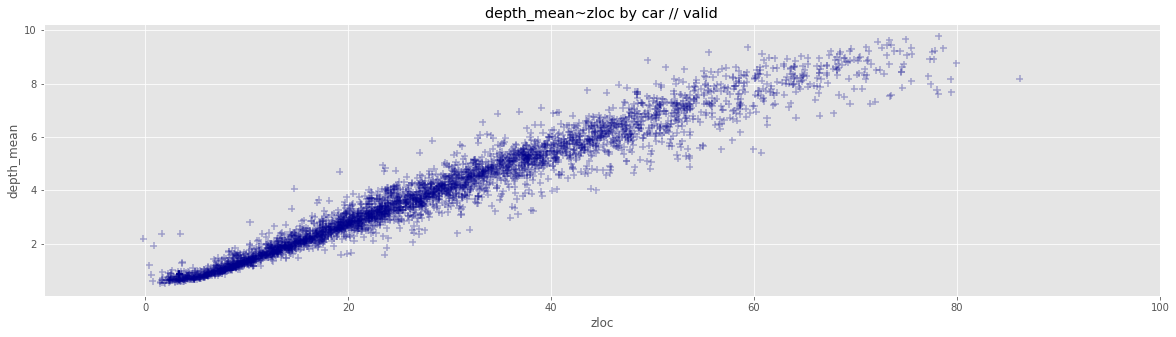

In [57]:
car = df_valid['car'].values * 50

plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=car, alpha=0.3)
plt.title('depth_mean~zloc by car // valid')
plt.xlim((-10,100))
plt.show()

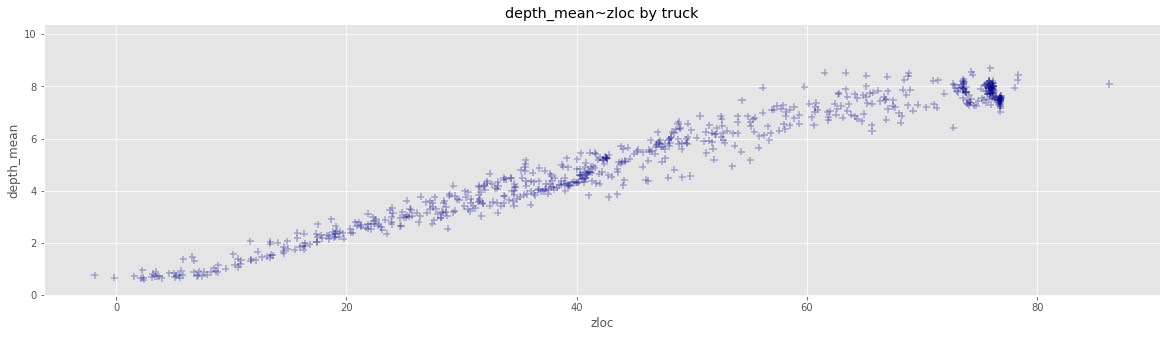

In [58]:
truck = df_train['truck'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=truck, alpha=0.3)
plt.title('depth_mean~zloc by truck')
plt.show()

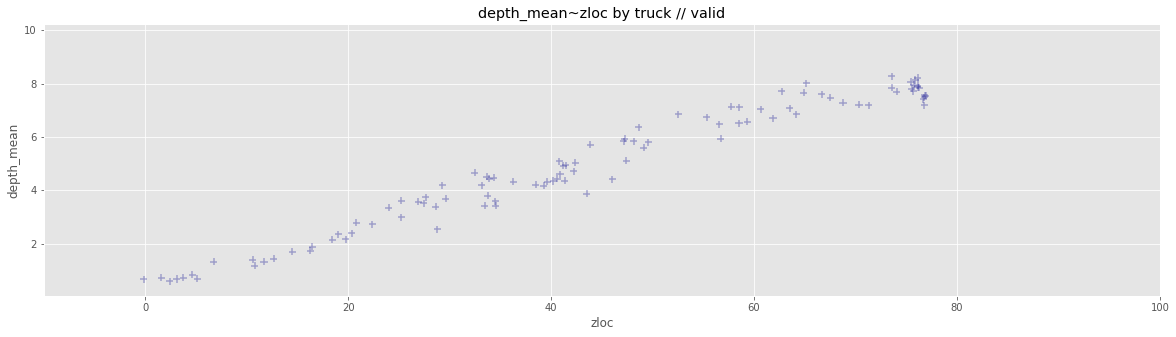

In [59]:
truck = df_valid['truck'].values * 50

plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=truck, alpha=0.3)
plt.title('depth_mean~zloc by truck // valid')
plt.xlim((-10,100))
plt.show()

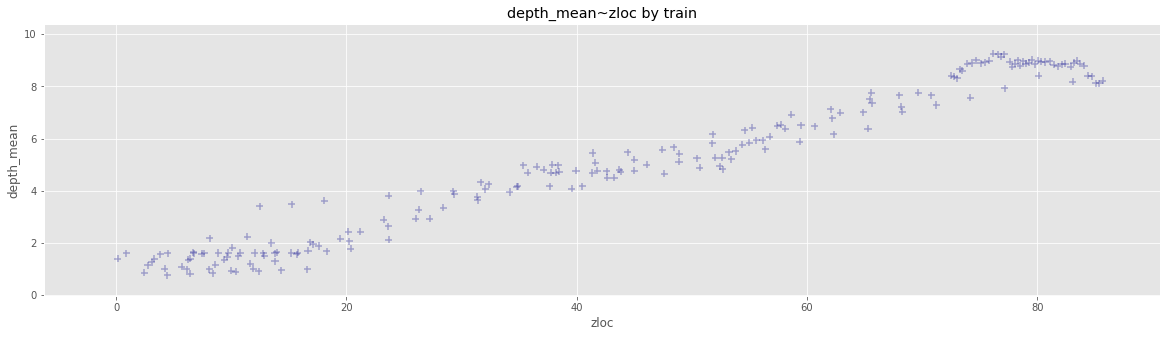

In [60]:
train = df_train['train'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=train, alpha=0.3)
plt.title('depth_mean~zloc by train')
plt.show()

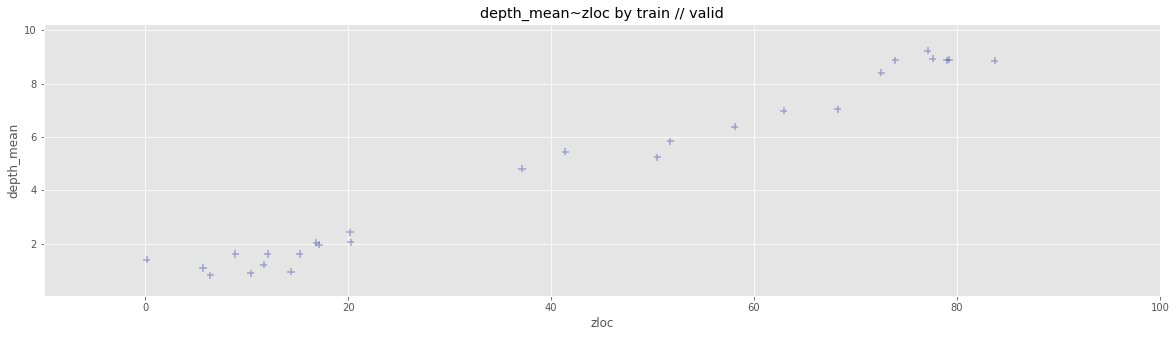

In [61]:
train = df_valid['train'].values * 50

plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=train, alpha=0.3)
plt.title('depth_mean~zloc by train // valid')
plt.xlim(-10,100)
plt.show()

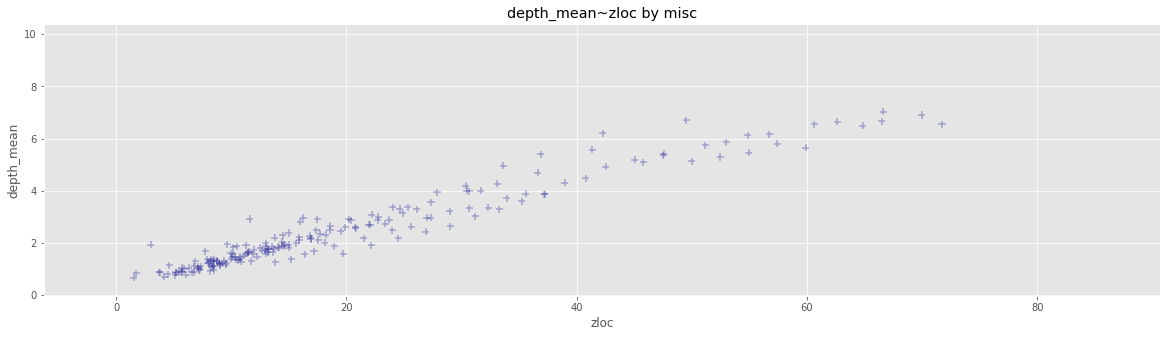

In [62]:
misc = df_train['Misc'].values * 50

plt.style.use('ggplot')
df_train.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=misc, alpha=0.3)
plt.title('depth_mean~zloc by misc')
plt.show()

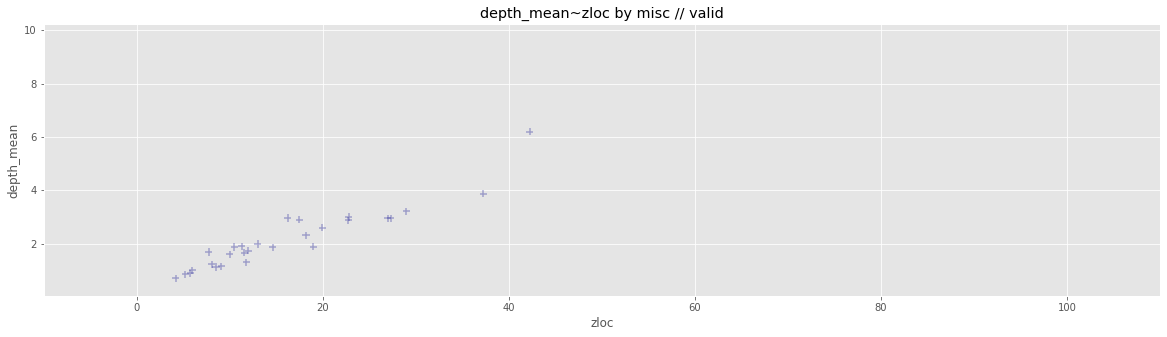

In [63]:
misc = df_valid['Misc'].values * 50

plt.style.use('ggplot')
df_valid.plot(kind='scatter', x='zloc', y='depth_mean', marker='+', figsize=(20,5), c='darkblue', s=misc, alpha=0.3)
plt.title('depth_mean~zloc by misc // valid')
plt.xlim(-10,110)
plt.show()

In [64]:
a = np.array([np.nan,np.nan])
np.nanmin(a)

C:\Users\Admin\AppData\Local\Temp/ipykernel_23396/2607173218.py:2: RuntimeWarning: All-NaN slice encountered
  np.nanmin(a)


nan